In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
notas = pd.Series([6,7,9,5,4.5], index = ['João','Maria','Hugo','Pedro','Paulo'])
print(notas)

João     6.0
Maria    7.0
Hugo     9.0
Pedro    5.0
Paulo    4.5
dtype: float64


In [3]:
print(notas.values)
print('\r')
print(notas.index)
print('\r')
print(notas['Hugo'])
print('\r')
print('media = ',notas.mean())
print('\r')
print('desvio padrão = ',notas.std())
print('\r')
print('Resumo = \n',notas.describe())

[6.  7.  9.  5.  4.5]

Index(['João', 'Maria', 'Hugo', 'Pedro', 'Paulo'], dtype='object')

9.0

media =  6.3

desvio padrão =  1.7888543819998317

Resumo = 
 count    5.000000
mean     6.300000
std      1.788854
min      4.500000
25%      5.000000
50%      6.000000
75%      7.000000
max      9.000000
dtype: float64


In [4]:
#Podemos aplicar expresssões matemáticas do numpy diretamente, como:
print('log das notas = \n{}'.format(np.log(notas)))
print('\r')
print('quadrado das notas = \n{}'.format(notas**2))


log das notas = 
João     1.791759
Maria    1.945910
Hugo     2.197225
Pedro    1.609438
Paulo    1.504077
dtype: float64

quadrado das notas = 
João     36.00
Maria    49.00
Hugo     81.00
Pedro    25.00
Paulo    20.25
dtype: float64


In [5]:
df_alunos = pd.DataFrame({'Alunos' : ['João','Pedro','Maria','Paulo'],
                      'Faltas' : [2,6,4,8],
                      'Provas' : [9,7,2,5],
                      'Seminario' : [7,9,4,1]})
print(df_alunos,'\n')
#plt.scatter(df_alunos.Alunos,df_alunos.Provas)
print(df_alunos.dtypes,'\n')
print(df_alunos.columns,'\n')
print(df_alunos['Alunos'],'\n')
print(df_alunos.describe())

  Alunos  Faltas  Provas  Seminario
0   João       2       9          7
1  Pedro       6       7          9
2  Maria       4       2          4
3  Paulo       8       5          1 

Alunos       object
Faltas        int64
Provas        int64
Seminario     int64
dtype: object 

Index(['Alunos', 'Faltas', 'Provas', 'Seminario'], dtype='object') 

0     João
1    Pedro
2    Maria
3    Paulo
Name: Alunos, dtype: object 

         Faltas    Provas  Seminario
count  4.000000  4.000000       4.00
mean   5.000000  5.750000       5.25
std    2.581989  2.986079       3.50
min    2.000000  2.000000       1.00
25%    3.500000  4.250000       3.25
50%    5.000000  6.000000       5.50
75%    6.500000  7.500000       7.50
max    8.000000  9.000000       9.00


In [6]:
print(df_alunos.sort_values(by='Provas'),'\n')
print(df_alunos.loc[2])

  Alunos  Faltas  Provas  Seminario
2  Maria       4       2          4
3  Paulo       8       5          1
1  Pedro       6       7          9
0   João       2       9          7 

Alunos       Maria
Faltas           4
Provas           2
Seminario        4
Name: 2, dtype: object


In [7]:
print(df_alunos[(df_alunos['Provas'] > 5) & (df_alunos['Seminario'] > 5)])

  Alunos  Faltas  Provas  Seminario
0   João       2       9          7
1  Pedro       6       7          9


In [8]:
df = pd.read_csv("Docs/fifa19.csv")
print(df.head(n=3)) # exibe n primeiros valores >> n padrão = 5
                    # tail exibe os n últimos números

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   

                  Club      ...       Composure Marking StandingTackle  \
0         FC Barcelona      ...            96.0    33.0           28.0   
1             Juventus      ...            95.0    28.0           31.0   
2  Paris Saint-Germain      ...            94.0    27.0           24.0 

<BarContainer object of 29 artists>

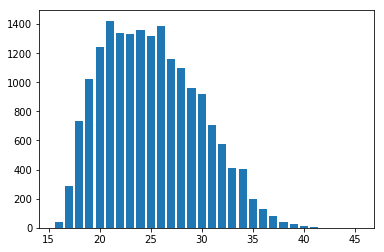

In [9]:
ages = df["Age"].value_counts() # value_counts(normalize=True)
plt.bar(ages.index,ages.values)
#plt.plot(ages.index,ages.values) ??????
#plt.scatter(ages.index,ages.values)

In [10]:
print(df.groupby("Age").mean().head())

       Unnamed: 0             ID    Overall  Potential      Special  \
Age                                                                   
16   16707.452381  244184.309524  54.452381  73.190476  1347.880952   
17   15858.183391  243575.795848  56.404844  74.339100  1378.802768   
18   15169.502732  242059.147541  57.741803  73.530055  1396.504098   
19   14127.623047  239909.397461  59.583008  73.146484  1439.607422   
20   12592.683065  236829.318548  61.858871  73.213710  1498.423387   

     International Reputation  Weak Foot  Skill Moves  Jersey Number  \
Age                                                                    
16                   1.000000   2.761905     2.095238      28.380952   
17                   1.000000   2.832753     2.177700      32.421603   
18                   1.001366   2.840164     2.120219      31.267760   
19                   1.006856   2.885406     2.214496      28.852106   
20                   1.004850   2.881164     2.268391      24.334142  

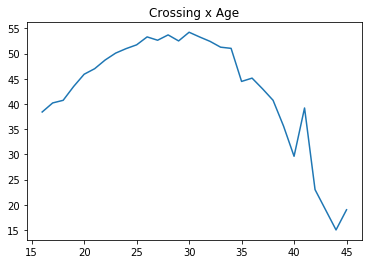

In [11]:
cross = df.groupby("Age").mean()["Crossing"]
#plt.bar(cross.index,cross.values)
plt.title("Crossing x Age")
plt.plot(cross.index,cross.values)

### dropna() returns all lines that doesn't have a NaN value
### fillna() fills all NaN values with argument
### isna() shows NaN values

In [12]:
cross.head().isna()

Age
16    False
17    False
18    False
19    False
20    False
Name: Crossing, dtype: bool

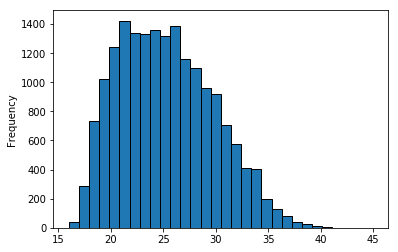

In [13]:
df['Age'].plot.hist(bins=30,edgecolor='black')

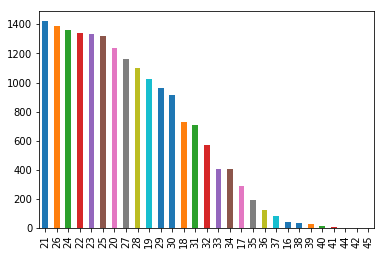

In [14]:
df['Age'].value_counts().plot.bar()

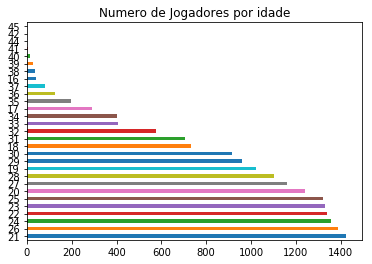

In [15]:
df['Age'].value_counts().plot.barh(title="Numero de Jogadores por idade")

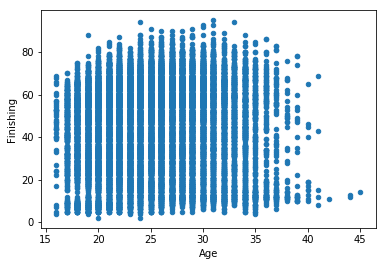

In [16]:
df.plot.scatter(x='Age',y='Finishing')

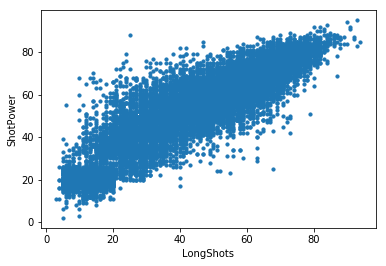

In [56]:
#plt.style.use('bmh')
df.plot.scatter(x='LongShots',y='ShotPower',s=10)

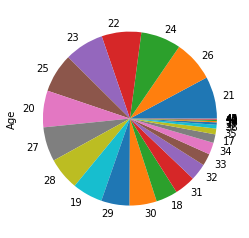

In [18]:
df['Age'].value_counts().plot.pie()

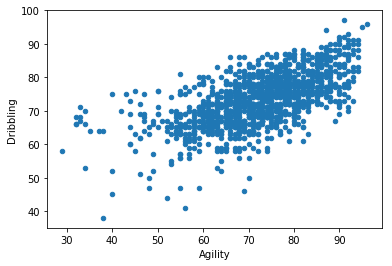

In [79]:
#dfac = df[df['Finishing']>70]
dfac.plot.scatter(x='Agility',y='Dribbling')

In [81]:
print('correlation between Agility and Dribbling = \t\t\t', df['Agility'].corr(df['Dribbling']))
print('correlation between Age and Finishing = \t\t\t', df['Age'].corr(df['Finishing']))
print('correlation between Free Kick Accuracy and BallControl = \t', df['FKAccuracy'].corr(df['BallControl']))
print('correlation between Age and Overall = \t\t\t\t', df['Age'].corr(df['Overall']))
print('correlation between LongShots and ShotPower = \t\t\t', df['LongShots'].corr(df['ShotPower']))

correlation between Agility and Dribbling = 			 0.7651530750379557
correlation between Age and Finishing = 			 0.06865984742020215
correlation between Free Kick Accuracy and BallControl = 	 0.759548210843157
correlation between Age and Overall = 				 0.45234952145633556
correlation between LongShots and ShotPower = 			 0.8892543491393221


In [59]:
df_alunos.to_csv("TesteAlunos.csv")

df33 = pd.read_csv("TesteAlunos.csv")
print(df33)

   Unnamed: 0 Alunos  Faltas  Provas  Seminario
0           0   João       2       9          7
1           1  Pedro       6       7          9
2           2  Maria       4       2          4
3           3  Paulo       8       5          1
